## Final Project Submission

Please fill out:
* Student name: Group 2
* Student pace: self paced / part time / full time: Part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


**Introduction**

The global real estate market has experienced significant shifts and challenges in recent years, with areas of rapid population growth and economic fluctuations at the forefront of these changes. This global trend has particular resonance in King County, Washington DC, where the housing market is undergoing substantial challenges.

King County is characterized by its diverse neighbourhoods‚Äô, fluctuating property values, and a dynamic real estate market. Real estate plays a pivotal role in the county's economic growth and community development, involving a broad spectrum of stakeholders such as real estate agents, property owners, homebuyers, investors, regulatory bodies, and the local community at large.

A central challenge within King County's real estate sector is the accurate prediction of house prices. The county's housing market is highly dynamic, influenced by factors like population growth, economic fluctuations, and changing buyer preferences. This volatility makes it challenging for both real estate agents and homeowners to set competitive prices that truly reflect the value of their properties and meet market demand. Without precise price predictions, stakeholders in King County may face difficulties in selling properties efficiently, maximizing returns on investments, and maintaining competitiveness in the market. Addressing this issue requires the development of robust predictive models and leveraging data-driven insights to guide pricing decisions effectively within King County's real estate market.

This research aims to explore the global trends impacting the real estate market and delve into the specific challenges and opportunities within King County, ultimately proposing innovative solutions to foster a more transparent, efficient, and competitive housing market in the county.


**Business Understanding:**

 King County, located in Washington DC, faces significant housing challenges due to its rapidly increasing population. The area is characterized by diverse neighborhoods, varying property values, and fluctuating market dynamics. Real estate is a crucial sector in King County, influencing both economic growth and community development. Key stakeholders include real estate agents, property owners, homebuyers, investors, regulatory bodies, and the local community. Understanding the intricacies of the housing market, including factors affecting property prices, buyer preferences, and market trends, is essential for making informed decisions and strategies in the real estate sector of King County

**Business Problem:**
One of the primary challenges facing stakeholders in King County's real estate market is accurately predicting house prices. The dynamic nature of the housing market, coupled with factors such as population growth, economic fluctuations, and changing buyer preferences, makes it difficult to determine optimal pricing strategies for properties. Real estate agents and homeowners often struggle to set competitive prices that reflect the true value of their properties and meet market demand. Without accurate price predictions, stakeholders may encounter difficulties in selling properties efficiently, maximizing returns on investments, and maintaining competitiveness in the market. Addressing this business problem requires developing robust predictive models and leveraging data-driven insights to guide pricing decisions effectively in King County's real estate market.

Stakeholders: Real estate agents, Property owners, Homebuyers, Investors and Regulatory bodies

**Research Questions**
* What are the key factors influencing house prices in King County, Washington DC? 
* How do factors such as the number of bedrooms, bathrooms, and overall grade of the property influence house prices in King County? 
* How do house sizes and lot sizes in the neighbouring areas affect house prices?


**Data Cleaning**

In [1]:
# Your code here - remember to use markdown cells for comments as well!
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Loading data
df = pd.read_csv('kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [3]:
# Checking the shape of the dataset
df.shape


(21597, 21)

In [4]:
# Checking available columns in the dataset 
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Checking the structure of the dataset(missingness & datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Identifying  Missing Data

In [6]:
# Identifying missingness
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# Handling missingness
df.isnull().mean()

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

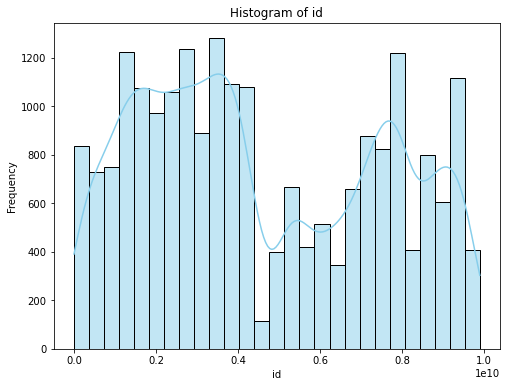

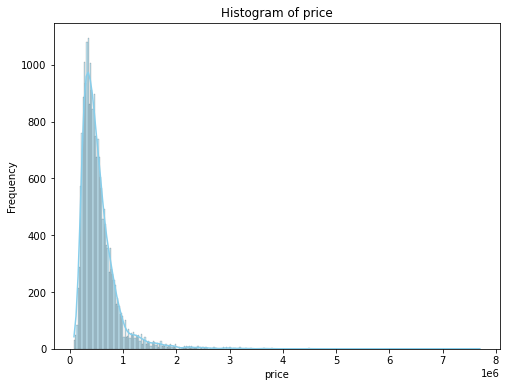

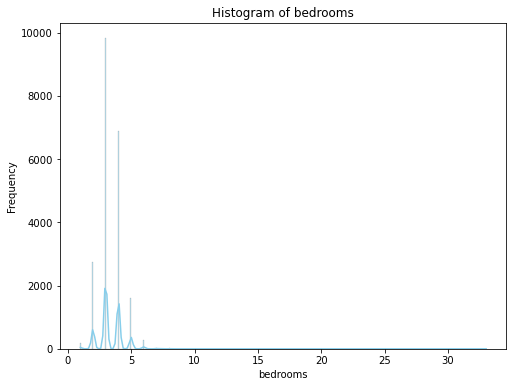

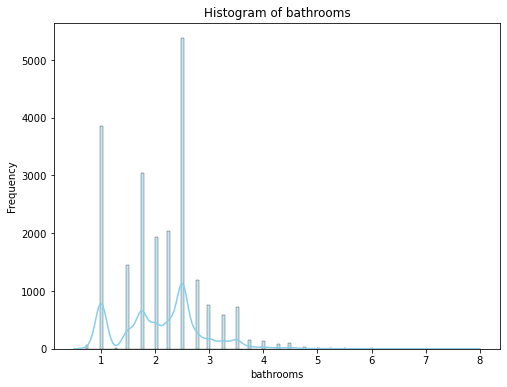

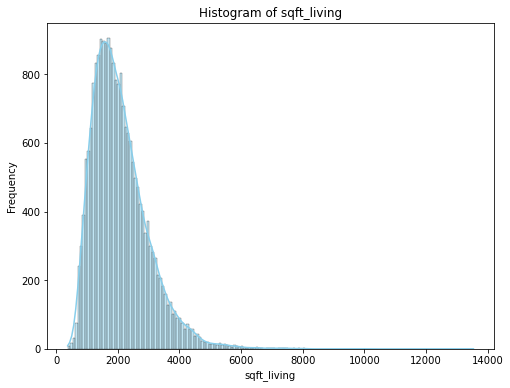

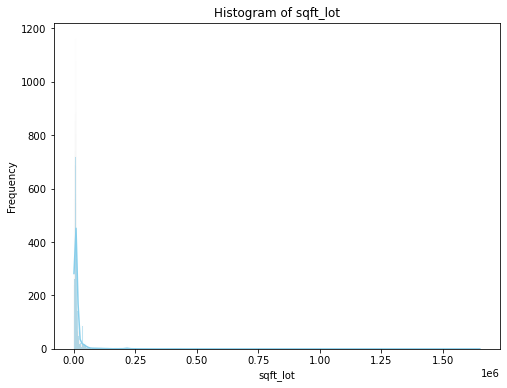

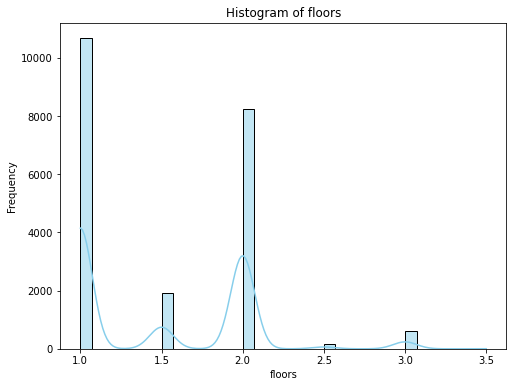

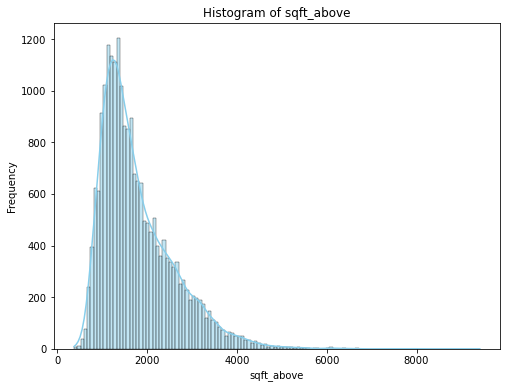

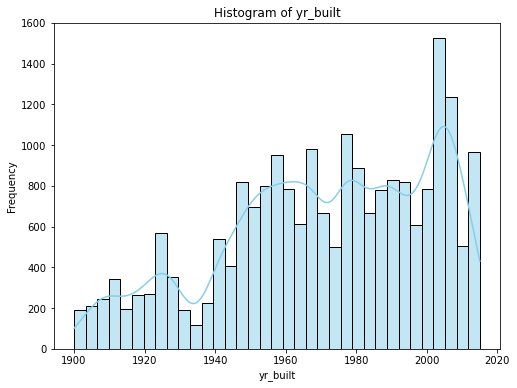

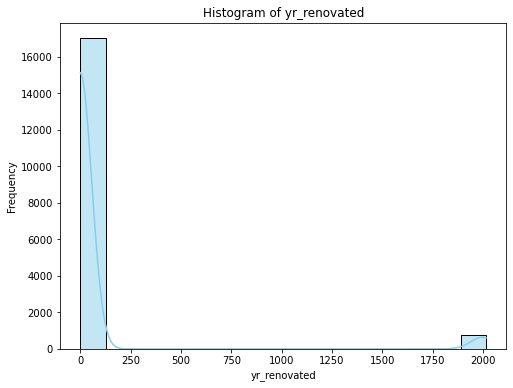

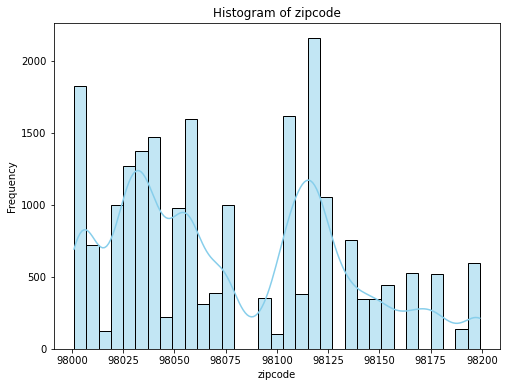

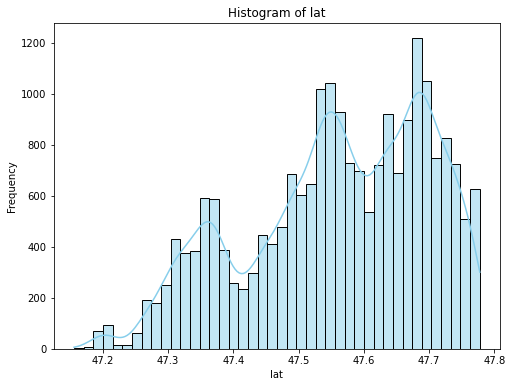

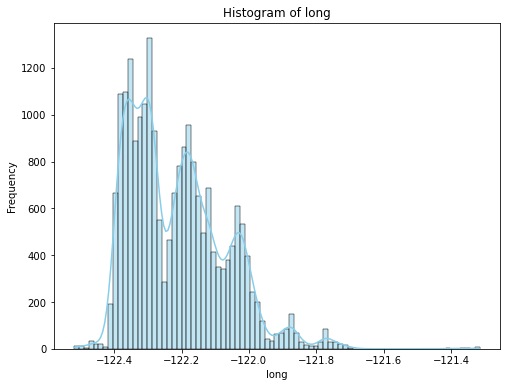

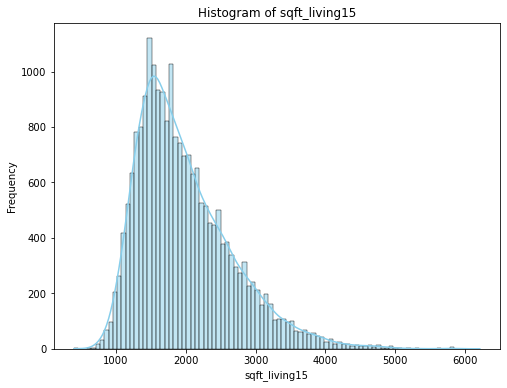

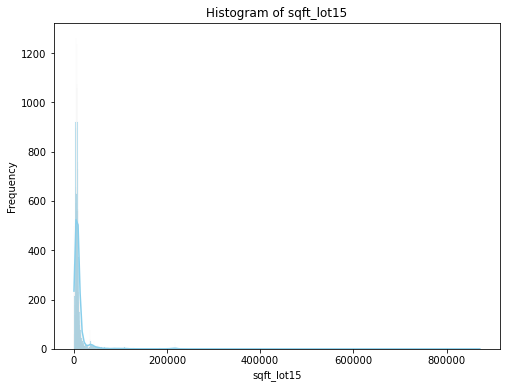

In [8]:
# Visualizing the distribution of the dataset to check for skewness that will guide in handling missingness
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Handling missing data

In [9]:
# Imputing waterfront column with mode
mode_waterfront = df['waterfront'].mode()[0]
df['waterfront'].fillna(mode_waterfront, inplace=True)

In [10]:
# Dropping rows with missing 'View' values 
df.dropna(subset=['view'], inplace=True)

In [11]:
# Imputing rows with missing 'yr_renovated' values 
median_year = df['yr_renovated']. median()

df['yr_renovated'].fillna(median_year, inplace=True)
# If your data is normally distributed and does not have outliers affecting the mean significantly, imputing with the mean might be appropriate.
# If your data is skewed or has outliers, imputing with the median might be more robust as it is less sensitive to outliers.

Identyfing & Handling Duplicates

In [12]:
df.duplicated().sum()

0

Identifying  Outliers

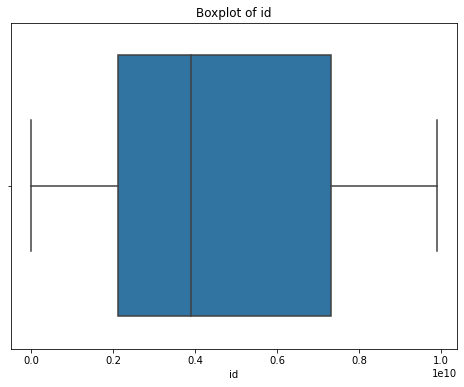

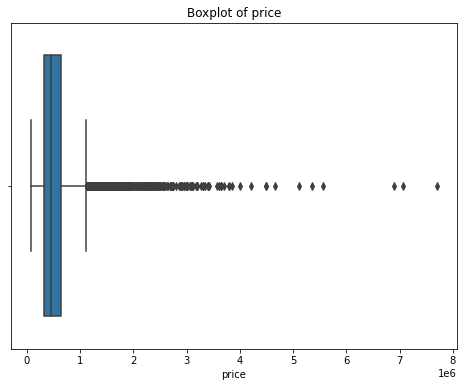

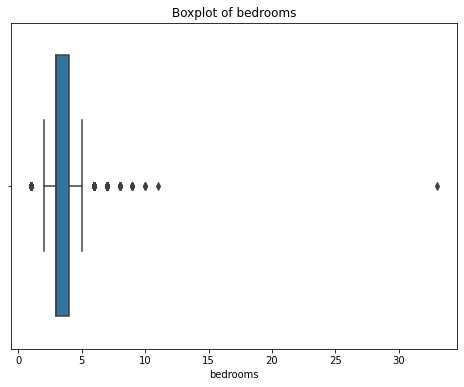

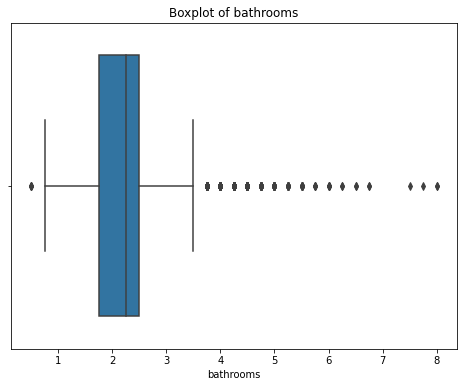

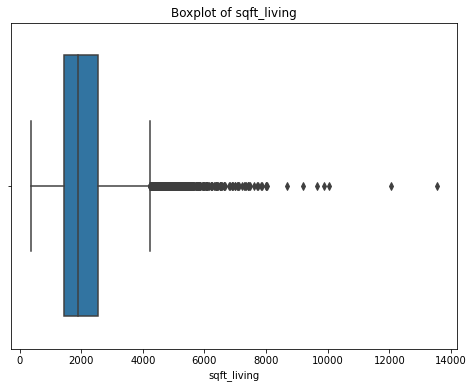

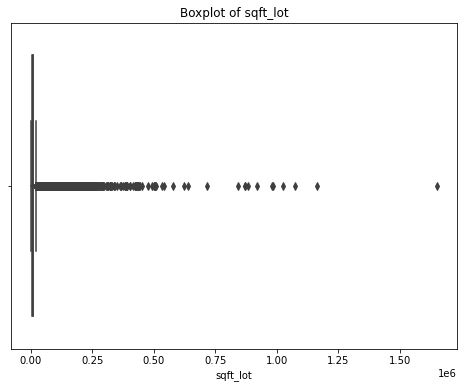

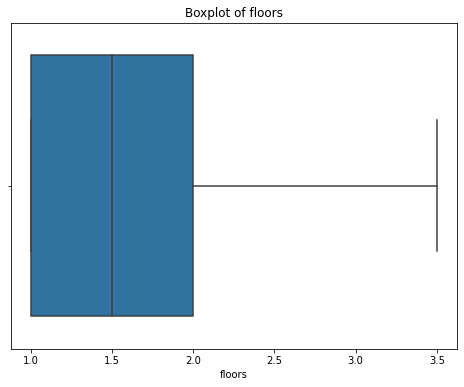

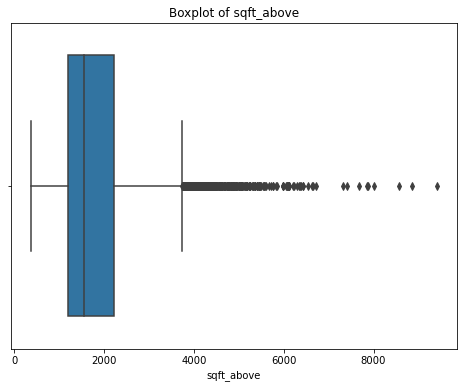

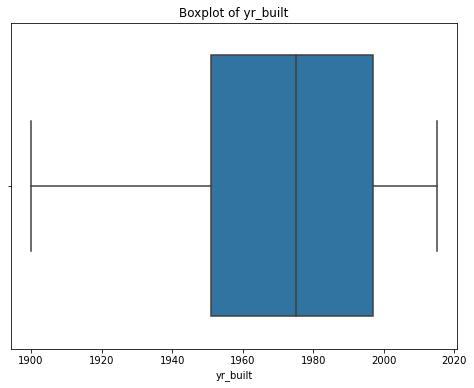

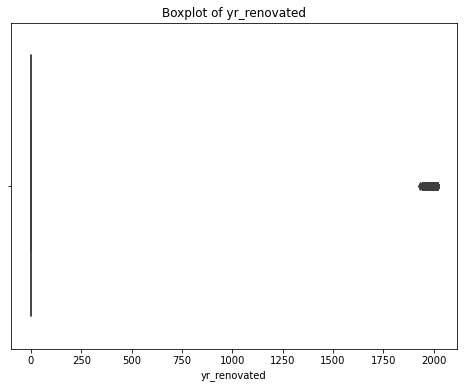

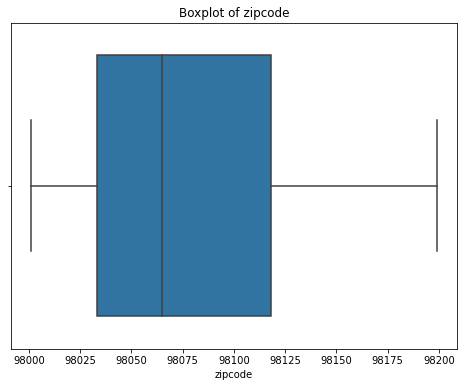

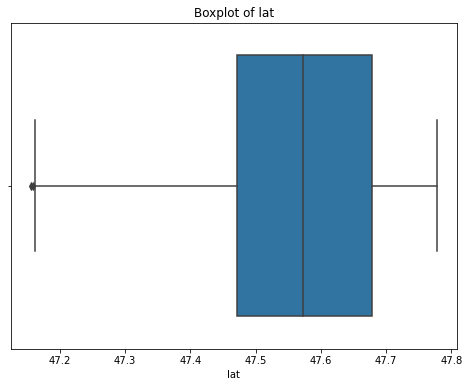

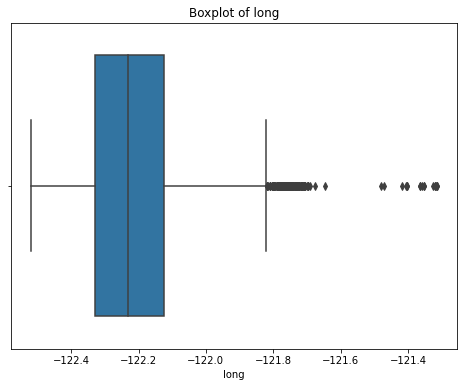

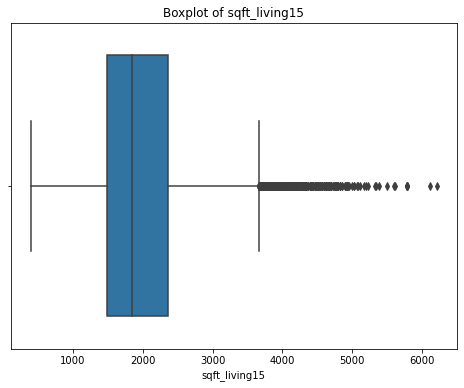

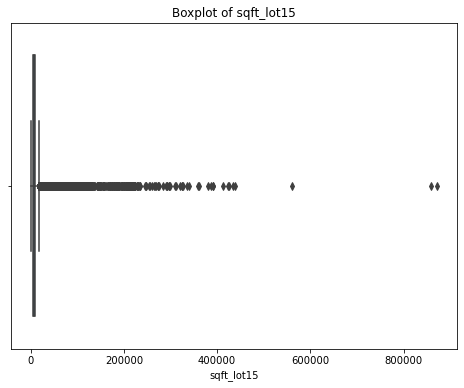

In [13]:
# Visualizing data to check for outliers
sns.boxplot
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [14]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.153400e+04  2.153400e+04  21534.000000  21534.000000  21534.000000   
mean   4.582351e+09  5.400577e+05      3.373038      2.115712   2079.827854   
std    2.876779e+09  3.660596e+05      0.926410      0.768602    917.446520   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123212e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904945e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.312175e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.153400e+04  21534.000000  21534.000000  21534.000000  21534.000000   
mean   1.509060e+04      1.494126   1788.557537   1971.002275     68.866722   
std    4.138021e+04      0.539806    827.745641     29.376044    364.314552   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.617000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068775e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21534.000000  21534.000000  21534.000000   21534.000000   21534.000000  
mean   98077.939352     47.560180   -122.213948    1986.299944   12751.079502  
std       53.506639      0.138528      0.140735     685.121001   27255.483308  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471200   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571900   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678100   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000


We identified outliers in the following columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
           'floors', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']. 
 We deployed the use of InterQuartile Range to handle the outliers



Handling Outliers

In [15]:
# Assuming df is your DataFrame containing the columns mentioned
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
           'floors', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

# Calculate the quartiles
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
# Remove outliers
df_filtered = df[~outliers]

# Display the filtered DataFrame
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)



Original DataFrame shape: (21534, 21)
Filtered DataFrame shape: (16856, 21)


In [16]:
df_filtered.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.685600e+04  1.685600e+04  16856.000000  16856.000000  16856.000000   
mean   4.765645e+09  4.577007e+05      3.281561      1.998665   1874.119245   
std    2.869689e+09  1.962153e+05      0.783761      0.658703    671.830180   
min    2.800031e+06  7.800000e+04      2.000000      0.750000    540.000000   
25%    2.326075e+09  3.054988e+05      3.000000      1.500000   1370.000000   
50%    4.077800e+09  4.200000e+05      3.000000      2.000000   1780.000000   
75%    7.518503e+09  5.750000e+05      4.000000      2.500000   2300.000000   
max    9.900000e+09  1.120000e+06      5.000000      3.500000   4230.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  16856.000000  16856.000000  16856.000000  16856.000000       16856.0   
mean    7156.290045      1.472087   1622.111711   1971.214404           0.0   
std     3437.874533      0.545613    641.493761     29.374200           0.0   
min      520.000000      1.000000    480.000000   1900.000000           0.0   
25%     4800.000000      1.000000   1150.000000   1952.000000           0.0   
50%     7155.000000      1.000000   1460.000000   1974.000000           0.0   
75%     9138.250000      2.000000   1960.250000   1998.000000           0.0   
max    19141.000000      3.500000   4190.000000   2015.000000           0.0   

            zipcode           lat          long  sqft_living15    sqft_lot15  
count  16856.000000  16856.000000  16856.000000   16856.000000  16856.000000  
mean   98080.738016     47.559046   -122.226703    1847.119364   7023.878856  
std       53.960780      0.139155      0.132692     548.657983   3059.723496  
min    98001.000000     47.155900   -122.503000     620.000000    651.000000  
25%    98033.000000     47.468500   -122.335000    1440.000000   4923.000000  
50%    98074.000000     47.568550   -122.262000    1740.000000   7200.000000  
75%    98118.000000     47.680700   -122.149000    2180.000000   8839.000000  
max    98199.000000     47.777600   -121.319000    3660.000000  17550.000000

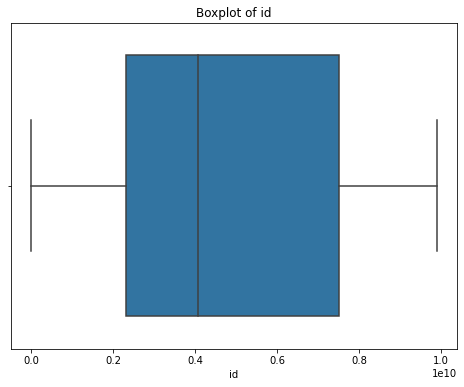

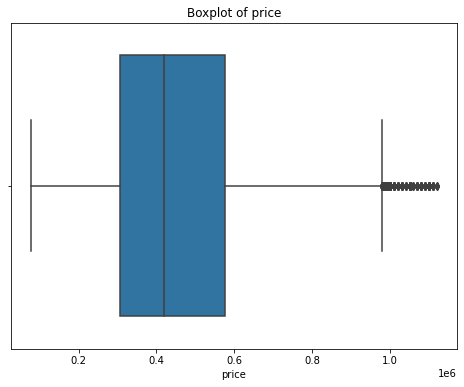

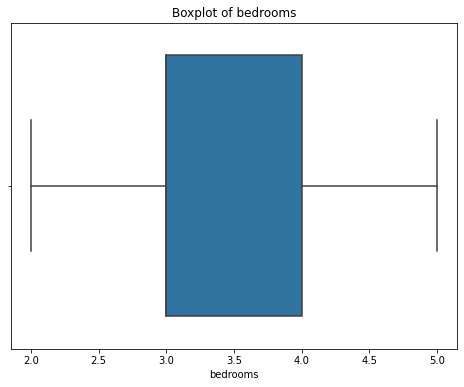

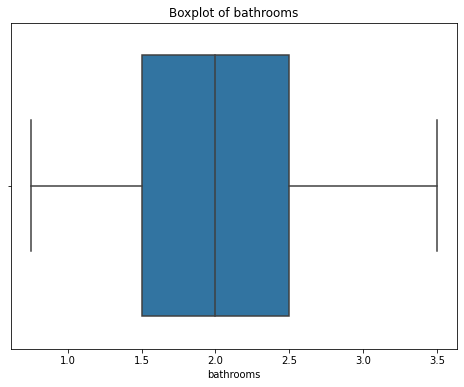

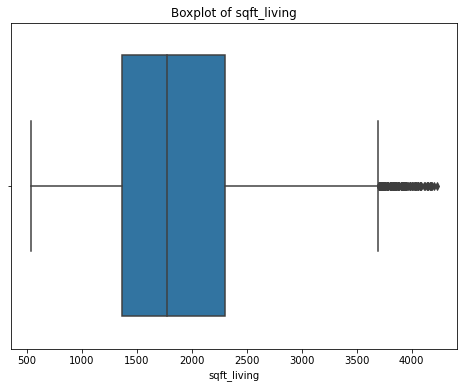

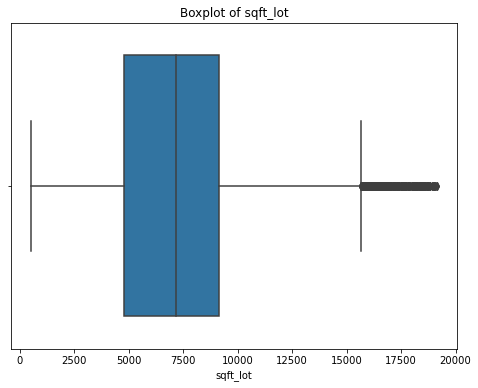

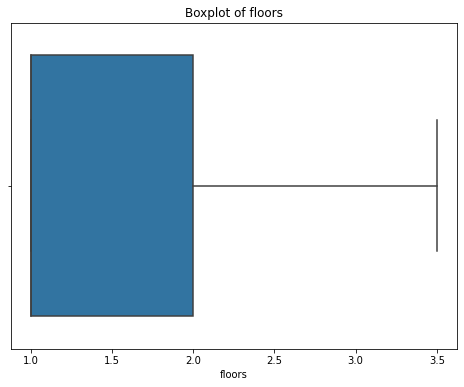

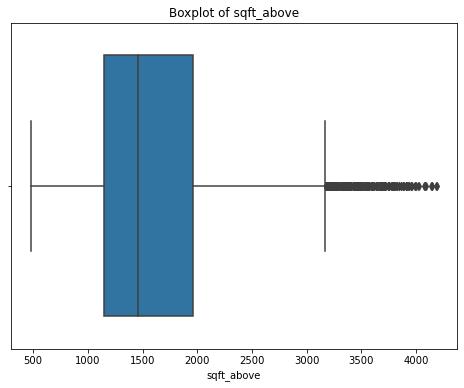

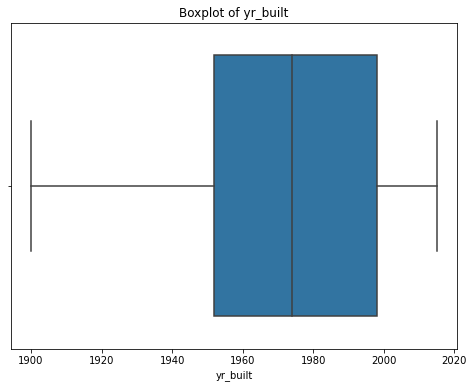

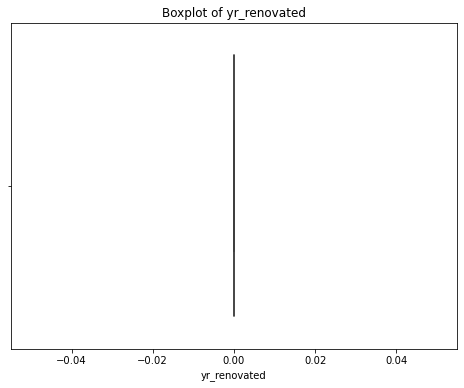

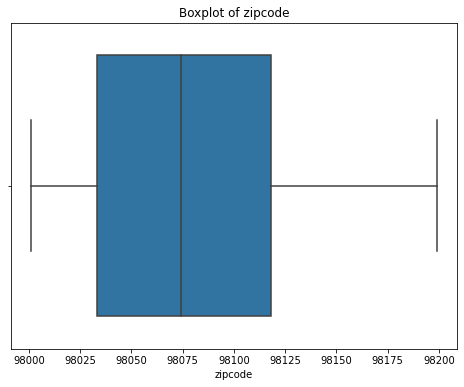

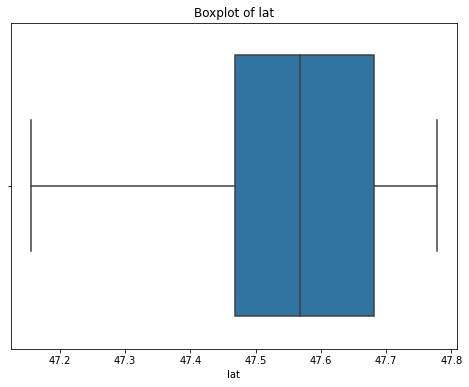

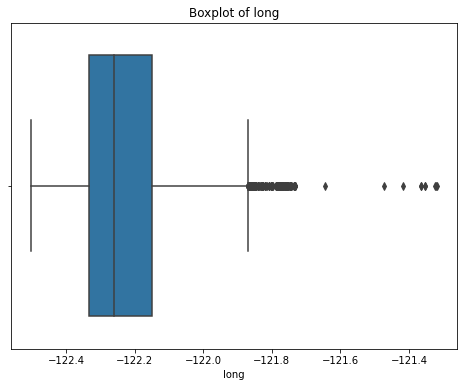

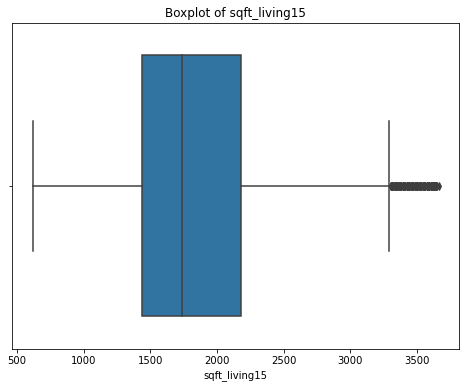

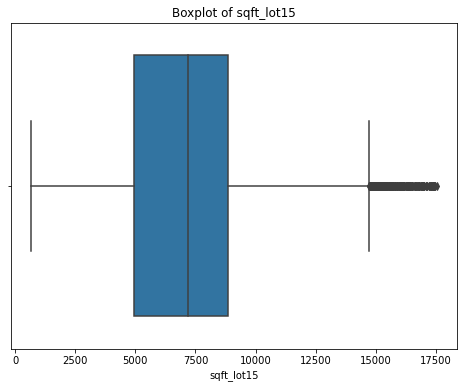

In [17]:
# Visualizing data after handling outliers

sns.boxplot
numerical_cols = df_filtered.select_dtypes(include=['float64', 'int64'])
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_filtered[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [18]:
#Changing data types

#df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y')
#df_filtered['yr_renovated'] = pd.to_datetime(df_filtered['yr_renovated'], format='%Y')
# df_filtered['yr_built'] = pd.to_datetime(df_filtered['yr_built'], format='%Y')


In [19]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16856 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16856 non-null  int64  
 1   date           16856 non-null  object 
 2   price          16856 non-null  float64
 3   bedrooms       16856 non-null  int64  
 4   bathrooms      16856 non-null  float64
 5   sqft_living    16856 non-null  int64  
 6   sqft_lot       16856 non-null  int64  
 7   floors         16856 non-null  float64
 8   waterfront     16856 non-null  object 
 9   view           16856 non-null  object 
 10  condition      16856 non-null  object 
 11  grade          16856 non-null  object 
 12  sqft_above     16856 non-null  int64  
 13  sqft_basement  16856 non-null  object 
 14  yr_built       16856 non-null  int64  
 15  yr_renovated   16856 non-null  float64
 16  zipcode        16856 non-null  int64  
 17  lat            16856 non-null  float64
 18  long  

In [20]:
# Exporting the cleaned dataset
df_filtered.to_csv('cleaned_dataset.csv', index=False)

In [21]:
df_filtered.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   
6  1321400060   6/27/2014  257500.0         3       2.25         1715   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0         NO  NONE  ...      7 Average       1180   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   
6      6819     2.0         NO  NONE  ...      7 Average       1715   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
2            0.0     1933           0.0    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   
6              ?     1995           0.0    98003  47.3097 -122.327   

   sqft_living15  sqft_lot15  
0           1340        5650  
2           2720        8062  
3           1360        5000  
4           1800        7503  
6           2238        6819  

[5 rows x 21 columns]

In [22]:
df = pd.read_csv('cleaned_dataset.csv')

df.sample(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
893   3320000810   2/24/2015  380000.0         5        2.0         1680   
9114  1138000070  11/13/2014  370000.0         3        1.5         1320   

      sqft_lot  floors waterfront  view  ...      grade sqft_above  \
893       3240     1.0         NO  NONE  ...     5 Fair        840   
9114      7201     1.0         NO  NONE  ...  7 Average       1320   

      sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
893           840.0     1906           0.0    98144  47.5965 -122.311   
9114            0.0     1971           0.0    98034  47.7126 -122.211   

      sqft_living15  sqft_lot15  
893            1380        1260  
9114           1380        7201  

[2 rows x 21 columns]

**Exploratory Data Analysis (EDA) for the cleaned Dataset**

In [23]:
#1. General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16856 entries, 0 to 16855
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16856 non-null  int64  
 1   date           16856 non-null  object 
 2   price          16856 non-null  float64
 3   bedrooms       16856 non-null  int64  
 4   bathrooms      16856 non-null  float64
 5   sqft_living    16856 non-null  int64  
 6   sqft_lot       16856 non-null  int64  
 7   floors         16856 non-null  float64
 8   waterfront     16856 non-null  object 
 9   view           16856 non-null  object 
 10  condition      16856 non-null  object 
 11  grade          16856 non-null  object 
 12  sqft_above     16856 non-null  int64  
 13  sqft_basement  16856 non-null  object 
 14  yr_built       16856 non-null  int64  
 15  yr_renovated   16856 non-null  float64
 16  zipcode        16856 non-null  int64  
 17  lat            16856 non-null  float64
 18  long  

In [24]:
# Droping id, date, yr_renovated and zipcode
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('yr_renovated', axis = 1 , inplace = True)
df.drop('zipcode', axis = 1 , inplace = True)

In [25]:
df.shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 16856
Number of columns: 17


In [26]:
#2. Check for missing values
print(df.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


**No missing values**

In [27]:
#3. Descriptive Statistics
pd.set_option('display.float_format',lambda x: '%.5f' %x)
df.describe()

price    bedrooms   bathrooms  sqft_living    sqft_lot  \
count   16856.00000 16856.00000 16856.00000  16856.00000 16856.00000   
mean   457700.71879     3.28156     1.99867   1874.11925  7156.29005   
std    196215.26781     0.78376     0.65870    671.83018  3437.87453   
min     78000.00000     2.00000     0.75000    540.00000   520.00000   
25%    305498.75000     3.00000     1.50000   1370.00000  4800.00000   
50%    420000.00000     3.00000     2.00000   1780.00000  7155.00000   
75%    575000.00000     4.00000     2.50000   2300.00000  9138.25000   
max   1120000.00000     5.00000     3.50000   4230.00000 19141.00000   

           floors  sqft_above    yr_built         lat        long  \
count 16856.00000 16856.00000 16856.00000 16856.00000 16856.00000   
mean      1.47209  1622.11171  1971.21440    47.55905  -122.22670   
std       0.54561   641.49376    29.37420     0.13916     0.13269   
min       1.00000   480.00000  1900.00000    47.15590  -122.50300   
25%       1.00000  1150.00000  1952.00000    47.46850  -122.33500   
50%       1.00000  1460.00000  1974.00000    47.56855  -122.26200   
75%       2.00000  1960.25000  1998.00000    47.68070  -122.14900   
max       3.50000  4190.00000  2015.00000    47.77760  -121.31900   

       sqft_living15  sqft_lot15  
count    16856.00000 16856.00000  
mean      1847.11936  7023.87886  
std        548.65798  3059.72350  
min        620.00000   651.00000  
25%       1440.00000  4923.00000  
50%       1740.00000  7200.00000  
75%       2180.00000  8839.00000  
max       3660.00000 17550.00000

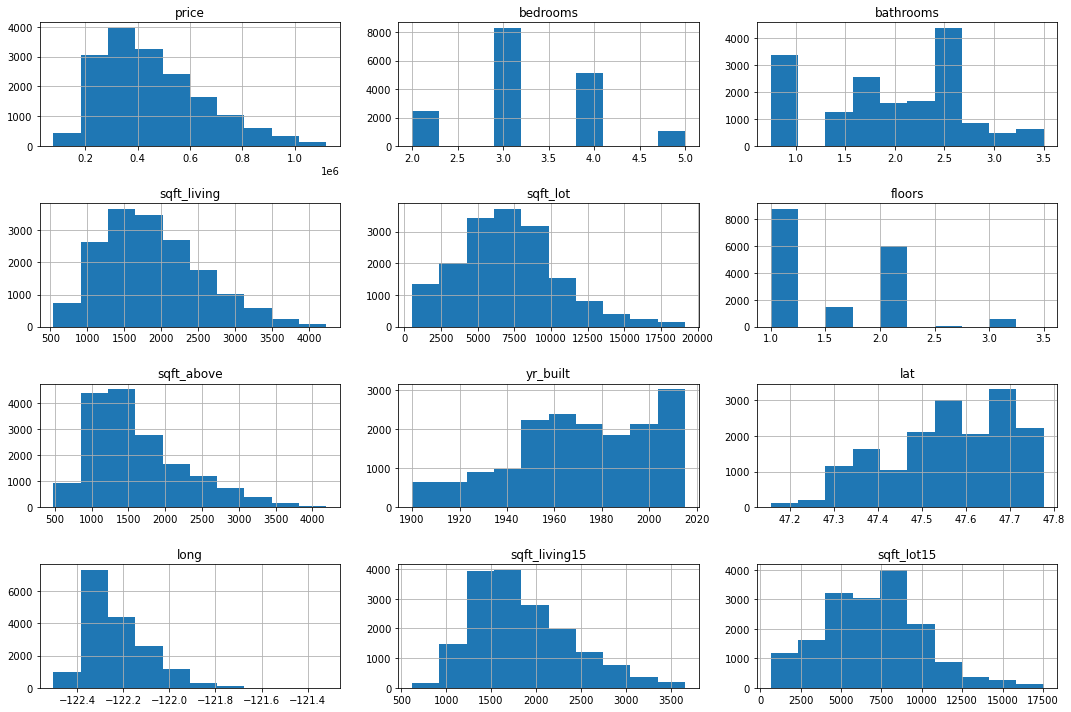

In [28]:
#4. Data Visualization
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [29]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [30]:
categorical_columns = ['waterfront', 'view', 'condition', 'grade']

for column in categorical_columns:
    counts = df[column].value_counts()
    print(f"Counts for {column}:\n{counts}\n")

Counts for waterfront:
NO     16842
YES       14
Name: waterfront, dtype: int64

Counts for view:
NONE         15747
AVERAGE        596
FAIR           221
GOOD           215
EXCELLENT       77
Name: view, dtype: int64

Counts for condition:
Average      10903
Good          4461
Very Good     1359
Fair           116
Poor            17
Name: condition, dtype: int64

Counts for grade:
7 Average        7885
8 Good           4966
6 Low Average    1716
9 Better         1691
10 Very Good      397
5 Fair            161
11 Excellent       31
4 Low               9
Name: grade, dtype: int64



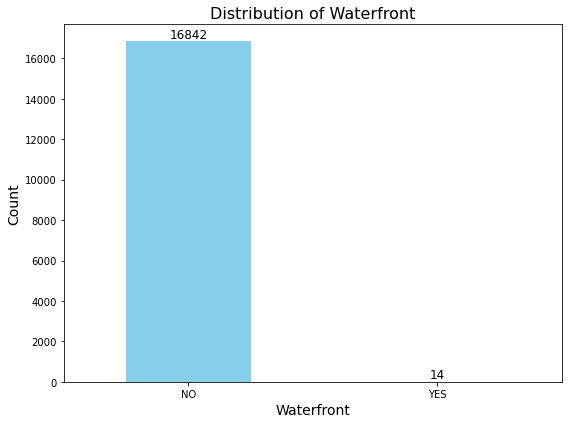

In [31]:
# Calculate frequency of each category
value_counts = df['waterfront'].value_counts()
# Plot bar chart
plt.figure(figsize=(8, 6))
bar_chart = value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
for i, v in enumerate(value_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=12)

plt.xlabel('Waterfront', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Waterfront', fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
# Show plot
plt.show()

In [32]:
# Calculate frequency of each category
value_counts = df['view'].value_counts()
# Plot bar chart
plt.figure(figsize=(8, 6))
bar_chart = value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
for i, v in enumerate(value_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=12)

plt.xlabel('view', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of view', fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
# Show plot
plt.show()

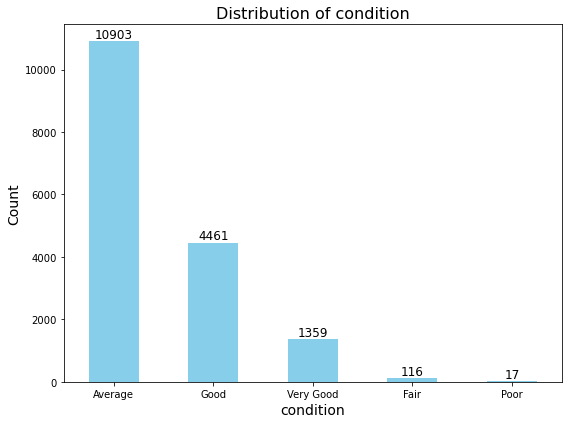

In [33]:
# Calculate frequency of each category
value_counts = df['condition'].value_counts()
# Plot bar chart
plt.figure(figsize=(8, 6))
bar_chart = value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
for i, v in enumerate(value_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=12)

plt.xlabel('condition', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of condition', fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
# Show plot
plt.show()

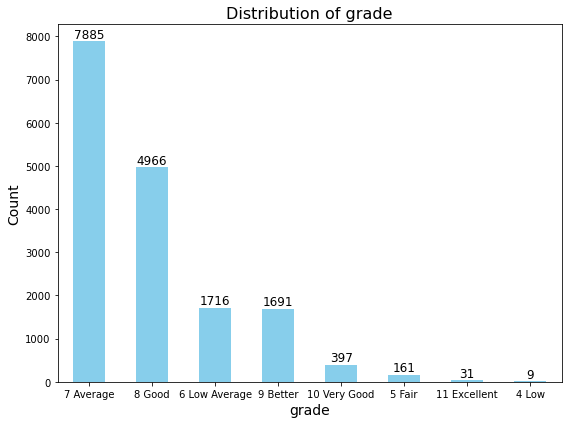

In [34]:
# Calculate frequency of each category
value_counts = df['grade'].value_counts()
# Plot bar chart
plt.figure(figsize=(8, 6))
bar_chart = value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
for i, v in enumerate(value_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=12)

plt.xlabel('grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of grade', fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
# Show plot
plt.show()

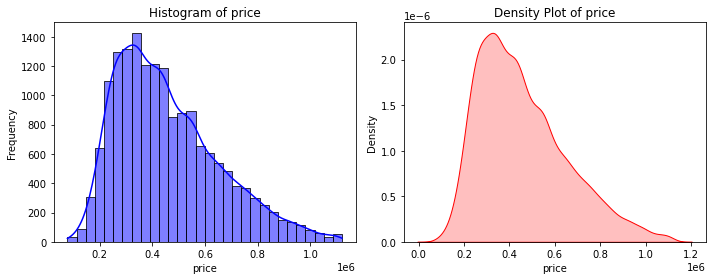

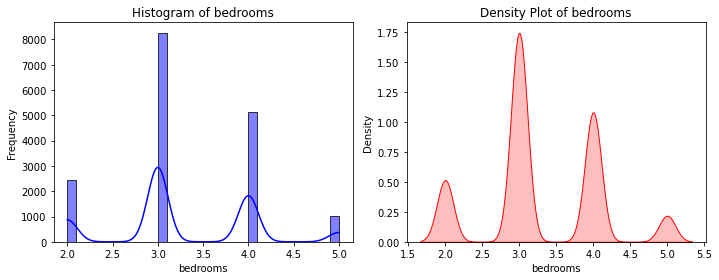

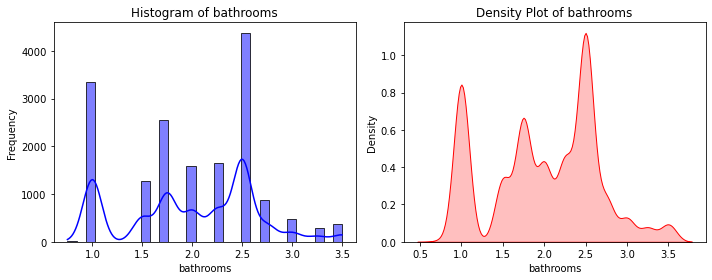

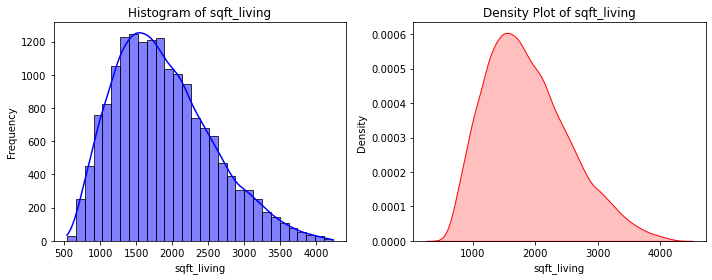

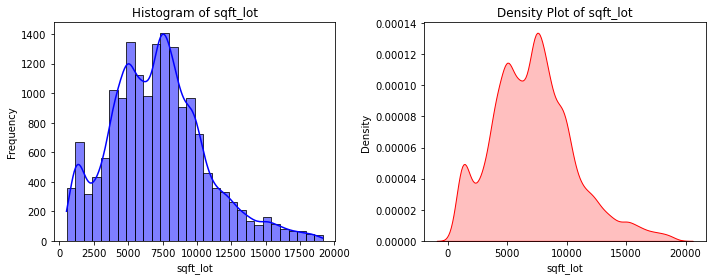

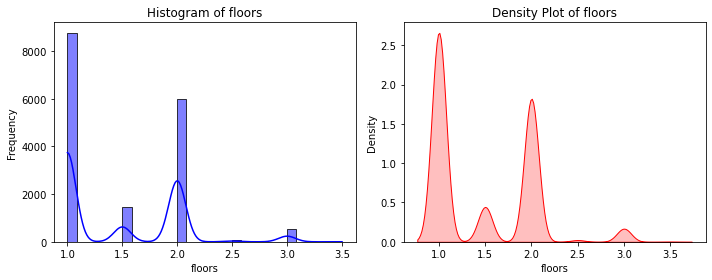

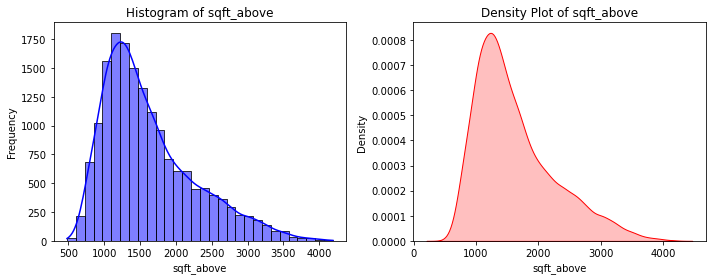

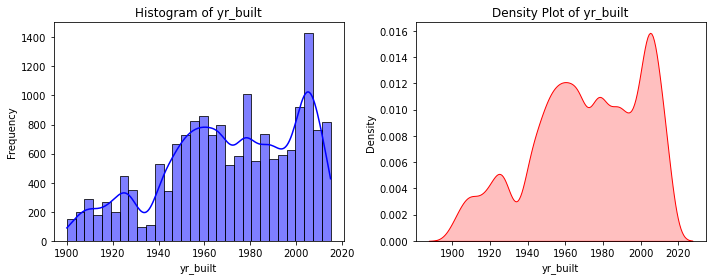

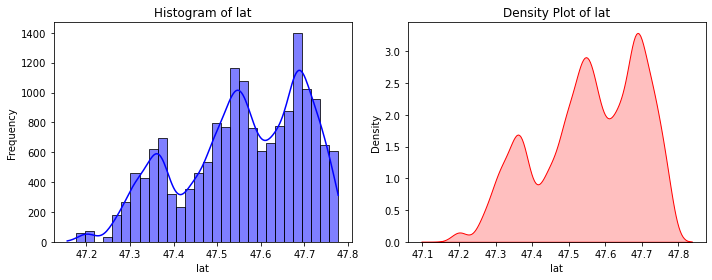

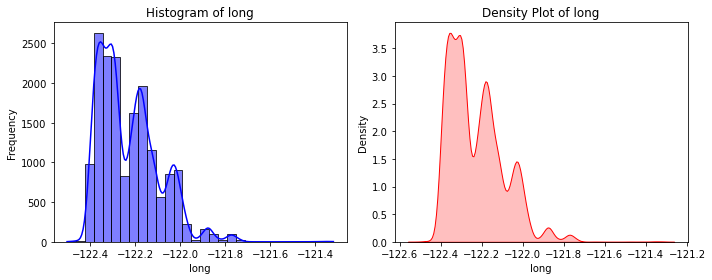

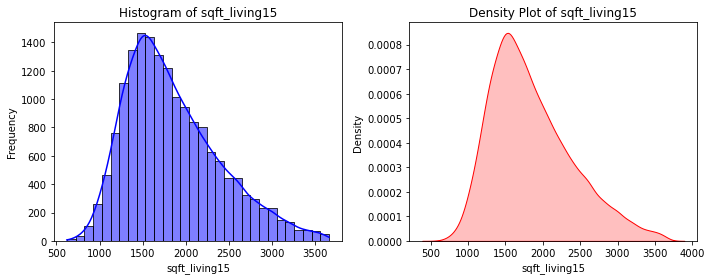

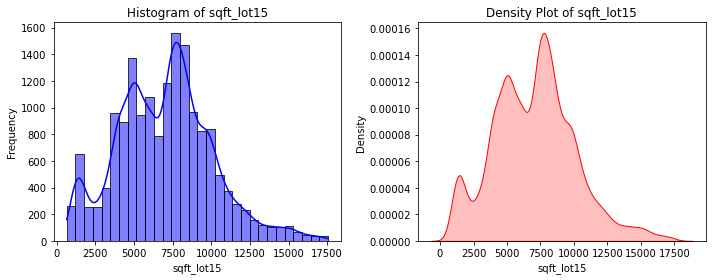

In [35]:
# 3.Normality and spread (standard deviation, skewness and kurtosis)

numerical_columns = df.select_dtypes(include=[np.number]).columns

# Create histograms and density plots
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Density Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[column], color='red', fill=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()


In [36]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [37]:
# Compute and print the standard deviation, skewness, and kurtosis
pd.set_option('display.float_format',lambda x: '%.5f' %x)
normality_spread = {
    'standard_deviation': df[numerical_columns].std(),
    'skewness': df[numerical_columns].skew(),
    'kurtosis': df[numerical_columns].kurt()
}

for key, value in normality_spread.items():
    print(f"{key}:")
    print(value)
    print("-----------------------")

standard_deviation:
price           196215.26781
bedrooms             0.78376
bathrooms            0.65870
sqft_living        671.83018
sqft_lot          3437.87453
floors               0.54561
sqft_above         641.49376
yr_built            29.37420
lat                  0.13916
long                 0.13269
sqft_living15      548.65798
sqft_lot15        3059.72350
dtype: float64
-----------------------
skewness:
price            0.80387
bedrooms         0.22383
bathrooms       -0.07454
sqft_living      0.60650
sqft_lot         0.54922
floors           0.75234
sqft_above       1.01696
yr_built        -0.43612
lat             -0.45213
long             0.96807
sqft_living15    0.75328
sqft_lot15       0.34497
dtype: float64
-----------------------
kurtosis:
price            0.19802
bedrooms        -0.32701
bathrooms       -0.76630
sqft_living     -0.03210
sqft_lot         0.43316
floors          -0.25896
sqft_above       0.60689
yr_built        -0.67909
lat             -0.75922
long     

**Bivariate Analysis**

In [38]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

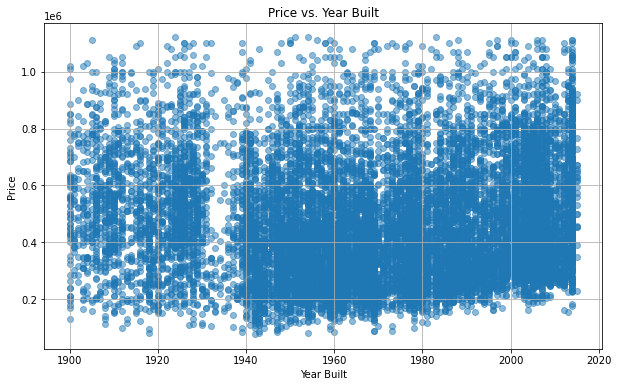

In [39]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['yr_built'], df['price'], alpha=0.5)
plt.title('Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.grid(True)
plt.show()

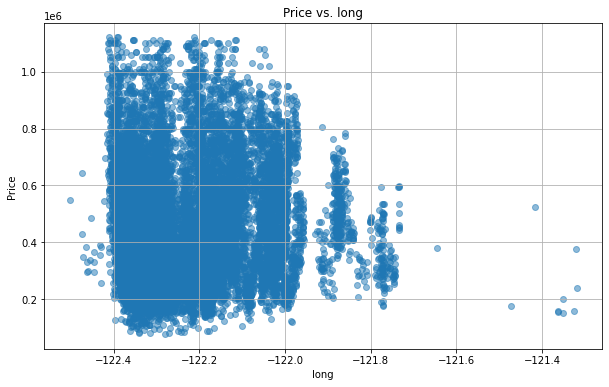

In [40]:
#Price against Long
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['long'], df['price'], alpha=0.5)
plt.title('Price vs. long')
plt.xlabel('long')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [41]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

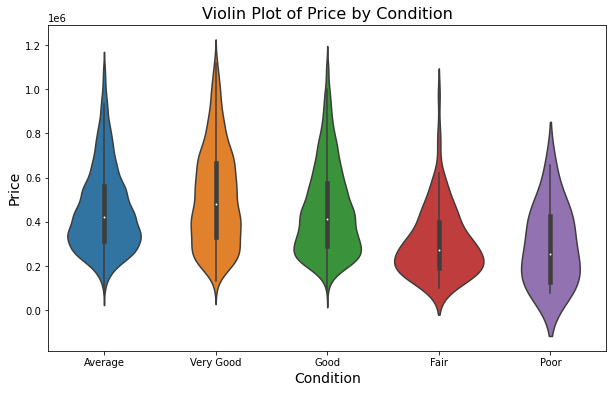

In [42]:
# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='condition', y='price', data=df)

# Add labels and title
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Violin Plot of Price by Condition', fontsize=16)

# Show plot
plt.show()

In [43]:
# Dropping the date  and id Columns

In [44]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0 221900.00000         3    1.00000         1180      5650 1.00000         NO   
1 180000.00000         2    1.00000          770     10000 1.00000         NO   
2 604000.00000         4    3.00000         1960      5000 1.00000         NO   
3 510000.00000         3    2.00000         1680      8080 1.00000         NO   
4 257500.00000         3    2.25000         1715      6819 2.00000         NO   

   view  condition          grade  sqft_above sqft_basement  yr_built  \
0  NONE    Average      7 Average        1180           0.0      1955   
1  NONE    Average  6 Low Average         770           0.0      1933   
2  NONE  Very Good      7 Average        1050         910.0      1965   
3  NONE    Average         8 Good        1680           0.0      1987   
4  NONE    Average      7 Average        1715             ?      1995   

       lat       long  sqft_living15  sqft_lot15  
0 47.51120 -122.25700           1340        5650  
1 47.73790 -122.23300           2720        8062  
2 47.52080 -122.39300           1360        5000  
3 47.61680 -122.04500           1800        7503  
4 47.30970 -122.32700           2238        6819

**Multivariate Analysis**

***Checking for Correlations**

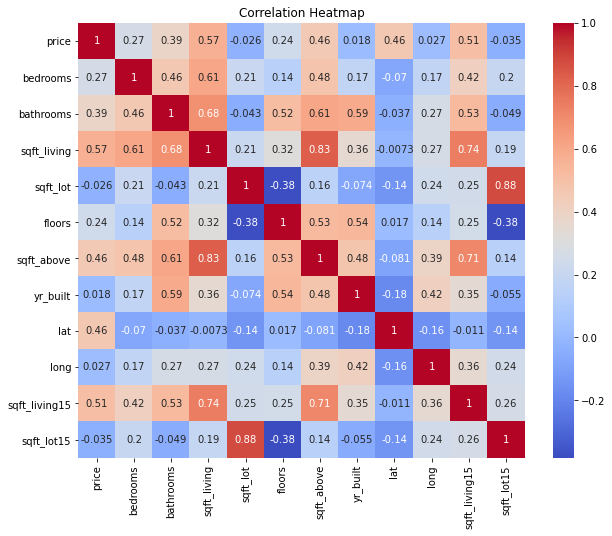

In [45]:
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

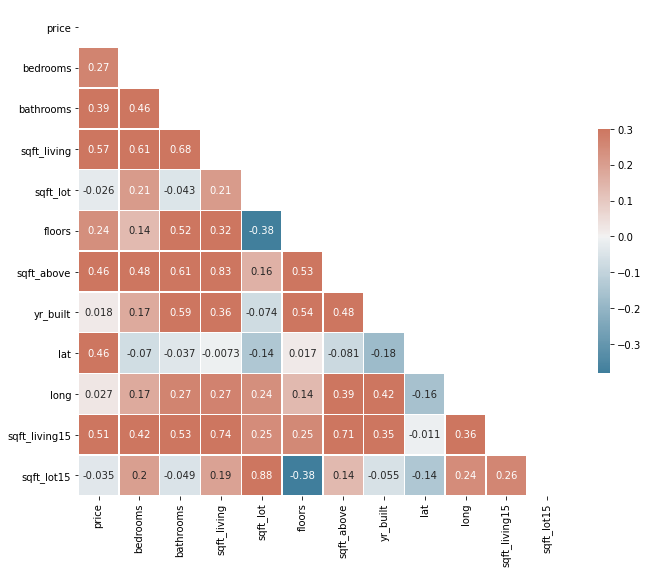

In [46]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True , linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

**Hypothesis Testing**

**Null Hypothesis (H0): There is no significant relationship between the various housing features and house prices in King County's real estate market.**
ùêª0:ùúá = x_bar

**Alternate Hypothesis (H1): There is a significant relationship between the various housing features and house prices in King County's real estate market.**
ùêª0:ùúá ‚â† x_bar

In [47]:
# Data Exploration and Preprocessing:


# Convert categorical variables into numerical representations using techniques like one-hot encoding.
# Scale or normalize numerical features if necessary.

In [48]:
df.describe()

price    bedrooms   bathrooms  sqft_living    sqft_lot  \
count   16856.00000 16856.00000 16856.00000  16856.00000 16856.00000   
mean   457700.71879     3.28156     1.99867   1874.11925  7156.29005   
std    196215.26781     0.78376     0.65870    671.83018  3437.87453   
min     78000.00000     2.00000     0.75000    540.00000   520.00000   
25%    305498.75000     3.00000     1.50000   1370.00000  4800.00000   
50%    420000.00000     3.00000     2.00000   1780.00000  7155.00000   
75%    575000.00000     4.00000     2.50000   2300.00000  9138.25000   
max   1120000.00000     5.00000     3.50000   4230.00000 19141.00000   

           floors  sqft_above    yr_built         lat        long  \
count 16856.00000 16856.00000 16856.00000 16856.00000 16856.00000   
mean      1.47209  1622.11171  1971.21440    47.55905  -122.22670   
std       0.54561   641.49376    29.37420     0.13916     0.13269   
min       1.00000   480.00000  1900.00000    47.15590  -122.50300   
25%       1.00000  1150.00000  1952.00000    47.46850  -122.33500   
50%       1.00000  1460.00000  1974.00000    47.56855  -122.26200   
75%       2.00000  1960.25000  1998.00000    47.68070  -122.14900   
max       3.50000  4190.00000  2015.00000    47.77760  -121.31900   

       sqft_living15  sqft_lot15  
count    16856.00000 16856.00000  
mean      1847.11936  7023.87886  
std        548.65798  3059.72350  
min        620.00000   651.00000  
25%       1440.00000  4923.00000  
50%       1740.00000  7200.00000  
75%       2180.00000  8839.00000  
max       3660.00000 17550.00000

In [49]:
# we take a sample of 30 houses, compute the sample mean x_bar

In [50]:

# # Example DataFrame creation with 16,000 values
# np.random.seed(5056)  # for reproducibility
# data = {
#     'price': np.random.randint(10000, 20000, size=16856),
#     'bathroom': np.random.randint(1, 4, size=16856),
#     'sqft_living': np.random.randint(10000, 20000, size=16856)
# }

# df = pd.DataFrame(data)

# # Randomly sample 1000 rows from the dataset
# df_sample = df.sample(n=1000, random_state=5056)

# # List of numerical variables
# numerical_vars = ['bathroom', 'sqft_living']

# # Perform ANOVA for each numerical variable with respect to the categorical variable 'condition'
# for var in numerical_vars:
#     formula = f"{var} ~ C(price)"
#     model = ols(formula, data=df_sample).fit()
#     anova_table = sm.stats.anova_lm(model, typ=2)
#     print(f"ANOVA for {var}:")
#     print(anova_table)
#     print()

In [51]:
# p_value = anova_table['PR(>F)'][0]
# if p_value < 0.05:
#     print(f"The p-value for {var} is {p_value}, which is less than 0.05. Thus, there is a significant difference in {var} based on the 'condition'.")
# else:
#     print(f"The p-value for {var} is {p_value}, which is greater than or equal to 0.05. Thus, there is no significant difference in {var} based on the 'condition'.")

#### Calculate the  z-score Test Statistic

We have the population (of houses/ features) standard deviation, so we calculate the z-score:

$$ z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} $$

Where $\bar{x}$ is the mean of xyz sample, $\mu$ is the mean of the (population of houses / features ), $\sigma$ is the standard deviation of the houses/ features data , and $n$ is the number of houses in the sample.

Calculate $z$ below.

In [52]:

import scipy.stats as stats
from math import sqrt
from numbers import Number

# # Population mean of the houses / feature 
# mu_0 = ?

# # Population standard deviation of the houses/ feature
# sigma = ?

# # Mean length of houses / feature  sample
# x_bar = ?

# # Number of houses / features in the sample
# n = ?

# # Alpha (1 - confidence level)
# alpha = 0.05

# z = (x_bar - mu_0) / (sigma / sqrt(n))
# z

In [53]:
# # determine if we can reject the null hypothesis at 95% confidence level

# # Perform calculations
# stats.norm.cdf(z)
# print(stats.norm.cdf(z))

# # Assign this to True or False
# reject_null_hypothesis = 

# # YOUR CODE HERE
# #raise NotImplementedError()

# reject_null_hypothesis

SyntaxError: invalid syntax (<ipython-input-53-8711a1fff19f>, line 8)

### Features Engineering 

In [54]:
# classify the houses based on their grades as suppar, average and superior

In [55]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0 221900.00000         3    1.00000         1180      5650 1.00000         NO   
1 180000.00000         2    1.00000          770     10000 1.00000         NO   
2 604000.00000         4    3.00000         1960      5000 1.00000         NO   
3 510000.00000         3    2.00000         1680      8080 1.00000         NO   
4 257500.00000         3    2.25000         1715      6819 2.00000         NO   

   view  condition          grade  sqft_above sqft_basement  yr_built  \
0  NONE    Average      7 Average        1180           0.0      1955   
1  NONE    Average  6 Low Average         770           0.0      1933   
2  NONE  Very Good      7 Average        1050         910.0      1965   
3  NONE    Average         8 Good        1680           0.0      1987   
4  NONE    Average      7 Average        1715             ?      1995   

       lat       long  sqft_living15  sqft_lot15  
0 47.51120 -122.25700           1340        5650  
1 47.73790 -122.23300           2720        8062  
2 47.52080 -122.39300           1360        5000  
3 47.61680 -122.04500           1800        7503  
4 47.30970 -122.32700           2238        6819

In [56]:
def grading (grade):
    if grade == "4 Low" or grade == "5 Fair"or grade == "6 Low Average":
        return "Subpar"
    elif grade == "7 Average" or grade == "8 Good" or grade == "9 Better":
        return "Standard"
    else:
        return "Superior"

In [57]:
df['grading'] = df['grade'].apply(grading)

In [58]:
# inspect the gradng column

grad = df['grading'].value_counts()
print(f"Counts for grading:\n{grad}\n")

Counts for grading:
Standard    14542
Subpar       1886
Superior      428
Name: grading, dtype: int64



In [59]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0 221900.00000         3    1.00000         1180      5650 1.00000         NO   
1 180000.00000         2    1.00000          770     10000 1.00000         NO   
2 604000.00000         4    3.00000         1960      5000 1.00000         NO   
3 510000.00000         3    2.00000         1680      8080 1.00000         NO   
4 257500.00000         3    2.25000         1715      6819 2.00000         NO   

   view  condition          grade  sqft_above sqft_basement  yr_built  \
0  NONE    Average      7 Average        1180           0.0      1955   
1  NONE    Average  6 Low Average         770           0.0      1933   
2  NONE  Very Good      7 Average        1050         910.0      1965   
3  NONE    Average         8 Good        1680           0.0      1987   
4  NONE    Average      7 Average        1715             ?      1995   

       lat       long  sqft_living15  sqft_lot15   grading  
0 47.51120 -122.25700           1340        5650  Standard  
1 47.73790 -122.23300           2720        8062    Subpar  
2 47.52080 -122.39300           1360        5000  Standard  
3 47.61680 -122.04500           1800        7503  Standard  
4 47.30970 -122.32700           2238        6819  Standard

In [60]:
# compare the grading against price

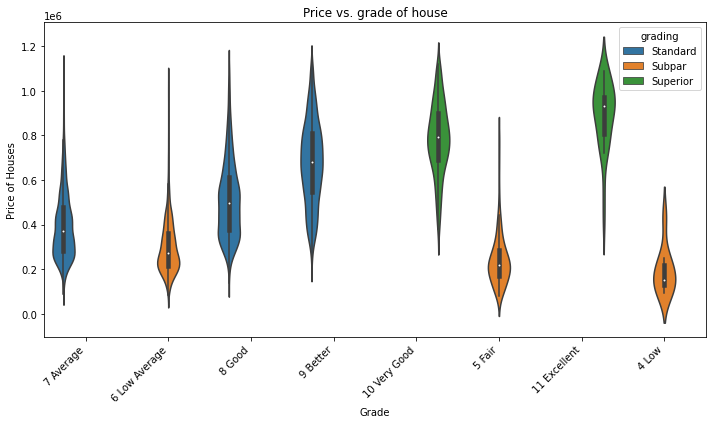

In [61]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='grade', y='price', hue='grading', data=df) #, alpha=0.7, s=80)

plt.title("Price vs. grade of house")
plt.xlabel("Grade")
plt.ylabel("Price of Houses")

plt.xticks(rotation=45, ha='right')


# Show plot
plt.tight_layout()
plt.show()

In [62]:
# Model Selection and Training:

# Choose appropriate model
# Split the data into training and testing/validation sets.
# Train the selected models on the training data.
# Evaluate the models using appropriate evaluation metrics 
# (e.g., mean squared error, mean absolute error, R-squared, etc.) on the testing/validation set.

We will build **two models ‚Äî one simple linear regression model and one multiple linear regresssion model**

There are two relevant components of interpreting the model summaries: model **metrics** such as r-squared and p-values, which tell us how well our model is fit to the data, and model **parameters** (intercept and coefficients), which tell us  how the model is using the feature(s) to predict the target.


In [63]:
df.corr()["price"]

price            1.00000
bedrooms         0.26537
bathrooms        0.38689
sqft_living      0.57173
sqft_lot        -0.02554
floors           0.24017
sqft_above       0.45643
yr_built         0.01767
lat              0.46286
long             0.02653
sqft_living15    0.51273
sqft_lot15      -0.03528
Name: price, dtype: float64

The sqft_living feature has the highest correlation with price, so we will use it to build a simple linear regression model.

In [64]:
#we import the necessary libraries

from statsmodels.formula.api import ols


# Replace None with appropriate code
simple_formula = 'price ~ sqft_living'
simple_model = ols(formula=simple_formula, data = df).fit()
simple_model_summary = simple_model.summary()


simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     8184.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:56:49   Log-Likelihood:            -2.2600e+05
No. Observations:               16856   AIC:                         4.520e+05
Df Residuals:                   16854   BIC:                         4.520e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.448e+05   3674.675     39.395      0.000    1.38e+05    1.52e+05
sqft_living   166.9787      1.846     90.467      0.000     163.361     170.597
==============================================================================
Omnibus:                      867.752   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1005.835
Skew:                           0.588   Prob(JB):                    3.85e-219
Kurtosis:                       3.226   Cond. No.                     5.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R squared  value of our regression model is 32.7%. This value indicates that approximately 32.7% of the variability in the dependent variable can be explained by the independent variable(s) included in our model. The remaining 67.3% of the variability is not accounted for by the predictors in the model.

The R squared value of 32.7% suggests a moderate level of explanatory power of our regression model. This result highlights the need for further research to explore additional variables and factors that may influence the dependent variable and to improve the predictive accuracy and explanatory power of the model.

Is the model statistically significant at  ùõº=0.05? # Compare the probability of the f-statistic to the alpha.
The p-value of 0.000 is less than the ùõº=0.05 therefore the model is statistically significant. 


In [65]:
# r_squared = simple_model.params['R-squared']

ùë¶=ùëöùë•+ùëè   where 
ùë¶  is the price,
ùëö is the slope of sqft_living, 
ùë• is sqft_living, and 
ùëè is the y-intercept (the value of ùë¶ when ùë•  is 0).

In [66]:
# Slope (coefficient of sqft_living)
m = simple_model.params['sqft_living']
m

# Intercept (coefficient of Intercept)
b = simple_model.params['Intercept']

# YOUR CODE HERE
# raise NotImplementedError()

print(f"""
Our simple linear regression model found a y-intercept of ${round(b, 2)}, theis means that for every increase of 1 square foot 
living area, the price increases by ${round(m, 2)} 
""")


Our simple linear regression model found a y-intercept of $144762.76, theis means that for every increase of 1 square foot 
living area, the price increases by $166.98 



### Normalization

We will normalize (or standardize) our data for this linear regression because our data is in different Scales/ units. 
This will help us
1. Handle the data better 
2. Ease interpretation of the model since the coefficients in our linear regression model represent the change in the price associated with a one-unit change in the standardized predictor variable we are reviewing. 
3. Reduce the impact of multicollinearity on the regression coefficients and their interpretability.

Standardization / normalization of the data results in a mean of zero and a standard deviation of  1

In [67]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']]

# we only consider columns with numericals
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Select only numerical columns
X = X[numerical_cols]

In [68]:
from sklearn.preprocessing  import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
standardized_data = scaler.fit_transform(X)

# Convert the standardized data back to a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=numerical_cols)

print("Original Data:")
# print(df)
print("\nStandardized Data:")
print(standardized_df)

Original Data:

Standardized Data:
       bedrooms  bathrooms  sqft_living  sqft_lot   floors  sqft_above  \
0      -0.35925   -1.51615     -1.03321  -0.43816 -0.86527    -0.68921   
1      -1.63519   -1.51615     -1.64350   0.82720 -0.86527    -1.32836   
2       0.91668    1.52021      0.12783  -0.62723 -0.86527    -0.89187   
3      -0.35925    0.00203     -0.28895   0.26869 -0.86527     0.09024   
4      -0.35925    0.38157     -0.23685  -0.09811  0.96759     0.14480   
...         ...        ...          ...       ...      ...         ...   
16851  -0.35925    0.76112     -0.51223  -1.75267  2.80045    -0.14359   
16852   0.91668    0.76112      0.64882  -0.39074  0.96759     1.07235   
16853  -1.63519   -1.89570     -1.27137  -1.68897  0.96759    -0.93864   
16854  -0.35925    0.76112     -0.40803  -1.38703  0.96759    -0.03447   
16855  -1.63519   -1.89570     -1.27137  -1.76867  0.96759    -0.93864   

       yr_built      lat     long  sqft_living15  sqft_lot15  
0      -0.552

In [69]:
# std.fit_transform(df)

### Building a Multiple regression

In [70]:

multiple_formula = 'price ~ sqft_living + sqft_above + sqft_living15 + yr_built + bathrooms + bedrooms + floors + lat + sqft_lot + long +sqft_lot15'
multiple_model = ols(formula = multiple_formula, data = df).fit()
multiple_model_summary = multiple_model.summary()


multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     2431.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:56:50   Log-Likelihood:            -2.2133e+05
No. Observations:               16856   AIC:                         4.427e+05
Df Residuals:                   16844   BIC:                         4.428e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -2.82e+07   1.12e+06    -25.103      0.000   -3.04e+07    -2.6e+07
sqft_living     123.6114      3.486     35.459      0.000     116.779     130.444
sqft_above        8.9496      3.467      2.582      0.010       2.155      15.744
sqft_living15    93.9381      2.748     34.182      0.000      88.551      99.325
yr_built      -1685.1716     46.975    -35.874      0.000   -1777.248   -1593.095
bathrooms      3.151e+04   2463.085     12.791      0.000    2.67e+04    3.63e+04
bedrooms      -2.013e+04   1554.979    -12.944      0.000   -2.32e+04   -1.71e+04
floors         2.752e+04   2817.833      9.766      0.000     2.2e+04     3.3e+04
lat            5.718e+05   7096.136     80.580      0.000    5.58e+05    5.86e+05
sqft_lot         -2.4110      0.584     -4.129      0.000      -3.556      -1.267
long          -3.571e+04   8566.189     -4.168      0.000   -5.25e+04   -1.89e+04
sqft_lot15       -3.4318      0.658     -5.216      0.000      -4.721      -2.142
==============================================================================
Omnibus:                     1563.022   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2638.115
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       4.399   Cond. No.                     1.38e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
#changing the variables to evaluate if it provides goodness of fit for the model
multiple_formula5 = 'price ~ X'
multiple_model5 = ols(formula = multiple_formula5, data = df).fit()
multiple_model5_summary = multiple_model5.summary()


multiple_model5_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     2431.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:56:50   Log-Likelihood:            -2.2133e+05
No. Observations:               16856   AIC:                         4.427e+05
Df Residuals:                   16844   BIC:                         4.428e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.82e+07   1.12e+06    -25.103      0.000   -3.04e+07    -2.6e+07
X[0]       -2.013e+04   1554.979    -12.944      0.000   -2.32e+04   -1.71e+04
X[1]        3.151e+04   2463.085     12.791      0.000    2.67e+04    3.63e+04
X[2]         123.6114      3.486     35.459      0.000     116.779     130.444
X[3]          -2.4110      0.584     -4.129      0.000      -3.556      -1.267
X[4]        2.752e+04   2817.833      9.766      0.000     2.2e+04     3.3e+04
X[5]           8.9496      3.467      2.582      0.010       2.155      15.744
X[6]       -1685.1716     46.975    -35.874      0.000   -1777.248   -1593.095
X[7]        5.718e+05   7096.136     80.580      0.000    5.58e+05    5.86e+05
X[8]       -3.571e+04   8566.189     -4.168      0.000   -5.25e+04   -1.89e+04
X[9]          93.9381      2.748     34.182      0.000      88.551      99.325
X[10]         -3.4318      0.658     -5.216      0.000      -4.721      -2.142
==============================================================================
Omnibus:                     1563.022   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2638.115
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       4.399   Cond. No.                     1.38e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
#changing the variables to evaluate if it provides goodness of fit for the model
multiple_formula1 = 'price ~ sqft_living + sqft_above + sqft_living15 + bathrooms + bedrooms + floors + yr_built'
multiple_model1 = ols(formula = multiple_formula1, data = df).fit()
multiple_model1_summary = multiple_model1.summary()


multiple_model1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     1964.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:56:50   Log-Likelihood:            -2.2431e+05
No. Observations:               16856   AIC:                         4.486e+05
Df Residuals:                   16848   BIC:                         4.487e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.977e+06      1e+05     49.593      0.000    4.78e+06    5.17e+06
sqft_living     159.9650      4.068     39.324      0.000     151.992     167.939
sqft_above      -44.4855      3.919    -11.352      0.000     -52.167     -36.804
sqft_living15    99.0545      3.204     30.915      0.000      92.774     105.335
bathrooms      3.646e+04   2928.675     12.450      0.000    3.07e+04    4.22e+04
bedrooms      -3.432e+04   1838.069    -18.670      0.000   -3.79e+04   -3.07e+04
floors         8.435e+04   2908.587     29.001      0.000    7.87e+04    9.01e+04
yr_built      -2543.8285     52.348    -48.594      0.000   -2646.437   -2441.220
==============================================================================
Omnibus:                      670.535   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.762
Skew:                           0.462   Prob(JB):                    2.63e-173
Kurtosis:                       3.526   Cond. No.                     3.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
#changing the variables to evaluate if it provides goodness of fit for the model

multiple_formula2 = 'price ~ sqft_living + sqft_above + sqft_living15 + bathrooms + bedrooms + floors + lat + long + yr_built'
multiple_model2 = ols(formula = multiple_formula2, data = df).fit()
multiple_model2_summary = multiple_model2.summary()


multiple_model2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2906.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:56:50   Log-Likelihood:            -2.2144e+05
No. Observations:               16856   AIC:                         4.429e+05
Df Residuals:                   16846   BIC:                         4.430e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.126e+07   1.11e+06    -28.101      0.000   -3.34e+07   -2.91e+07
sqft_living     123.2762      3.506     35.157      0.000     116.403     130.149
sqft_above        1.4104      3.453      0.409      0.683      -5.357       8.178
sqft_living15    88.5361      2.734     32.384      0.000      83.177      93.895
bathrooms       3.47e+04   2470.790     14.045      0.000    2.99e+04    3.95e+04
bedrooms      -2.249e+04   1557.751    -14.437      0.000   -2.55e+04   -1.94e+04
floors         4.638e+04   2548.560     18.198      0.000    4.14e+04    5.14e+04
lat            5.824e+05   7109.393     81.914      0.000    5.68e+05    5.96e+05
long          -5.653e+04   8512.904     -6.641      0.000   -7.32e+04   -3.98e+04
yr_built      -1701.1904     47.212    -36.033      0.000   -1793.730   -1608.650
==============================================================================
Omnibus:                     1383.029   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2225.827
Skew:                           0.625   Prob(JB):                         0.00
Kurtosis:                       4.268   Cond. No.                     4.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The multiple regression model with an R squared  value of 61.4% demonstrates substantially improved explanatory power compared to the simple linear regression model with an R squared value of 32.7%. 
The inclusion of additional independent variables in the multiple regression model has significantly enhanced the model's ability to explain the variability in the price.
The R squared values and the comparison between the two models highlight the importance of considering multiple factors and variables in regression analysis to develop a more comprehensive and accurate understanding of the relationship between the independent variables and the price.**

### Splitting our data for training and testing

In [74]:
# explain why we split data into training and testing data

In [75]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'grading'],
      dtype='object')

In [76]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']]

# we only consider columns with numericals
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Select only numerical columns
X = X[numerical_cols]

In [77]:
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0             3    1.00000         1180      5650 1.00000        1180   
1             2    1.00000          770     10000 1.00000         770   
2             4    3.00000         1960      5000 1.00000        1050   
3             3    2.00000         1680      8080 1.00000        1680   
4             3    2.25000         1715      6819 2.00000        1715   
...         ...        ...          ...       ...     ...         ...   
16851         3    2.50000         1530      1131 3.00000        1530   
16852         4    2.50000         2310      5813 2.00000        2310   
16853         2    0.75000         1020      1350 2.00000        1020   
16854         3    2.50000         1600      2388 2.00000        1600   
16855         2    0.75000         1020      1076 2.00000        1020   

       yr_built      lat       long  sqft_living15  sqft_lot15  
0          1955 47.51120 -122.25700           1340        5650  
1          1933 47.73790 -122.23300           2720        8062  
2          1965 47.52080 -122.39300           1360        5000  
3          1987 47.61680 -122.04500           1800        7503  
4          1995 47.30970 -122.32700           2238        6819  
...         ...      ...        ...            ...         ...  
16851      2009 47.69930 -122.34600           1530        1509  
16852      2014 47.51070 -122.36200           1830        7200  
16853      2009 47.59440 -122.29900           1020        2007  
16854      2004 47.53450 -122.06900           1410        1287  
16855      2008 47.59410 -122.29900           1020        1357  

[16856 rows x 11 columns]

In [78]:
Y = df['price']

In [79]:
Y

0       221900.00000
1       180000.00000
2       604000.00000
3       510000.00000
4       257500.00000
            ...     
16851   360000.00000
16852   400000.00000
16853   402101.00000
16854   400000.00000
16855   325000.00000
Name: price, Length: 16856, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split



# we split our data into 80% train and 20% split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.20, random_state = 101)

In [81]:
# the features of x_train

X_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
2076          3    2.25000         1960     17126 1.00000        1400   
3951          5    1.75000         2120      8399 1.00000        1320   
4858          4    3.00000         3110      7231 2.00000        3110   
7713          3    2.50000         1600      1311 3.00000        1600   
2347          2    1.00000          960      4920 1.00000         960   
...         ...        ...          ...       ...     ...         ...   
2623          3    1.75000         1810      5733 1.00000        1010   
12363         4    2.50000         2220      5900 2.00000        2220   
5695          3    2.25000         1590     11745 1.00000        1090   
8006          3    1.50000          980      7770 1.00000         980   
13151         4    2.75000         1820      5400 1.00000        1220   

       yr_built      lat       long  sqft_living15  sqft_lot15  
2076       1966 47.44360 -122.21000           2060       11466  
3951       1942 47.76210 -122.33500           2120        8398  
4858       1997 47.32790 -122.19100           2820        7311  
7713       2005 47.69030 -122.39400           1390        1321  
2347       1942 47.69460 -122.36200           1010        5040  
...         ...      ...        ...            ...         ...  
2623       1926 47.57090 -122.38800           1260        4680  
12363      2014 47.69560 -122.36000           1620        5900  
5695       1978 47.35530 -122.28000           1540       12530  
8006       1968 47.69230 -122.20100           1470        7350  
13151      1988 47.52040 -122.20500           1630        5400  

[13484 rows x 11 columns]

In [82]:
# The labels of X_train

Y_train

2076    285750.00000
3951    377691.00000
4858    367500.00000
7713    465000.00000
2347    280000.00000
            ...     
2623    515000.00000
12363   652600.00000
5695    190000.00000
8006    463800.00000
13151   430000.00000
Name: price, Length: 13484, dtype: float64

In [83]:
X_test

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
7141          3    2.75000         1960     13252 1.00000        1240   
3703          3    1.75000         1960      5000 1.00000         980   
12646         3    2.50000         1640      7847 2.00000        1640   
11393         3    2.25000         2090     15000 1.00000        2090   
7477          3    1.75000         2590      8384 1.00000        1590   
...         ...        ...          ...       ...     ...         ...   
8744          4    1.75000         1650      7088 1.00000        1650   
60            4    2.00000         2750      7807 1.50000        2250   
4470          2    2.50000         1560      1222 2.00000        1080   
9187          2    1.00000          960      4000 1.00000         960   
8528          3    2.00000         2140      4923 1.00000        1070   

       yr_built      lat       long  sqft_living15  sqft_lot15  
7141       1975 47.55820 -122.13900           2040        9866  
3703       1911 47.55760 -122.31700           1790        5000  
12646      1987 47.56840 -122.01800           1870        6079  
11393      1961 47.48850 -121.78300           1690       14400  
7477       1971 47.77390 -122.19900           2590        8800  
...         ...      ...        ...            ...         ...  
8744       1973 47.56880 -122.08700           1850        7523  
60         1916 47.71680 -122.28700           1510        7807  
4470       2008 47.60400 -122.30700           1560        2081  
9187       1918 47.55540 -122.26700           1210        4000  
8528       1928 47.69020 -122.33900           1470        4923  

[3372 rows x 11 columns]

In [84]:
Y_test

7141    550000.00000
3703    415000.00000
12646   480000.00000
11393   383000.00000
7477    485000.00000
            ...     
8744    559500.00000
60      571000.00000
4470    435000.00000
9187    290000.00000
8528    710000.00000
Name: price, Length: 3372, dtype: float64

In [85]:
X_train_scaler = scaler.fit_transform(X_train)
X_train_scaler

array([[-0.35862708,  0.38327608,  0.1294331 , ...,  0.12660407,
         0.39085414,  1.46227023],
       [ 2.19320806, -0.37478695,  0.36782357, ..., -0.81146974,
         0.50031435,  0.4546605 ],
       [ 0.91729049,  1.52037063,  1.84286458, ...,  0.26919128,
         1.7773501 ,  0.09766187],
       ...,
       [-0.35862708,  0.38327608, -0.42184485, ..., -0.39871726,
        -0.55780098,  1.81171506],
       [-0.35862708, -0.75381846, -1.3307085 , ...,  0.19414538,
        -0.68550456,  0.11047047],
       [ 0.91729049,  1.14133912, -0.07915855, ...,  0.16412702,
        -0.39361067, -0.52995944]])

In [86]:
X_test_scaler = scaler.transform(X_test)
X_test_scaler

array([[-0.35862708,  1.14133912,  0.1294331 , ...,  0.65942998,
         0.35436741,  0.93678927],
       [-0.35862708, -0.37478695,  0.1294331 , ..., -0.67638711,
        -0.10171679, -0.66132968],
       [-0.35862708,  0.7623076 , -0.34734783, ...,  1.56748542,
         0.04423015, -0.30695846],
       ...,
       [-1.63454465,  0.7623076 , -0.46654306, ..., -0.6013412 ,
        -0.52131425, -1.620004  ],
       [-1.63454465, -1.5118815 , -1.36050731, ..., -0.30115759,
        -1.15983212, -0.98975528],
       [-0.35862708,  0.00424457,  0.39762238, ..., -0.8414881 ,
        -0.68550456, -0.68661845]])

### Model training

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [88]:
lr.fit(X_train_scaler,Y_train) # fit is for the training the model

LinearRegression()

In [89]:
# We now test out model to see how it predicts the prices of the houses

lr.predict(X_test_scaler) # predict is for the testing the model

array([464804.46361948, 560645.96935427, 438668.06829917, ...,
       441677.99369912, 369178.79518045, 611106.38744432])

In [90]:
X_test

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
7141          3    2.75000         1960     13252 1.00000        1240   
3703          3    1.75000         1960      5000 1.00000         980   
12646         3    2.50000         1640      7847 2.00000        1640   
11393         3    2.25000         2090     15000 1.00000        2090   
7477          3    1.75000         2590      8384 1.00000        1590   
...         ...        ...          ...       ...     ...         ...   
8744          4    1.75000         1650      7088 1.00000        1650   
60            4    2.00000         2750      7807 1.50000        2250   
4470          2    2.50000         1560      1222 2.00000        1080   
9187          2    1.00000          960      4000 1.00000         960   
8528          3    2.00000         2140      4923 1.00000        1070   

       yr_built      lat       long  sqft_living15  sqft_lot15  
7141       1975 47.55820 -122.13900           2040        9866  
3703       1911 47.55760 -122.31700           1790        5000  
12646      1987 47.56840 -122.01800           1870        6079  
11393      1961 47.48850 -121.78300           1690       14400  
7477       1971 47.77390 -122.19900           2590        8800  
...         ...      ...        ...            ...         ...  
8744       1973 47.56880 -122.08700           1850        7523  
60         1916 47.71680 -122.28700           1510        7807  
4470       2008 47.60400 -122.30700           1560        2081  
9187       1918 47.55540 -122.26700           1210        4000  
8528       1928 47.69020 -122.33900           1470        4923  

[3372 rows x 11 columns]

From our model, it shows that the 7141st house that is a 3 bedroom house of 1960 squarefoot, should be sold at USD 464804.23

In [91]:
# Y_pred is the model price 

Y_pred = lr.predict(X_test_scaler)

In [92]:
# Y_test is the actual price from the data

Y_test

7141    550000.00000
3703    415000.00000
12646   480000.00000
11393   383000.00000
7477    485000.00000
            ...     
8744    559500.00000
60      571000.00000
4470    435000.00000
9187    290000.00000
8528    710000.00000
Name: price, Length: 3372, dtype: float64

From Y_test, we see that this house should be sold at USD 550,000.00

In [93]:
from sklearn.metrics import mean_absolute_error,r2_score

# computing the mean absolute error from the 3372 entries tested. 
mean_absolute_error(Y_test,Y_pred)

92415.49593108507

##### This result shows that the difference between the predicted value and the test value(actual data) is USD 92415.20 which is a significant difference 
(**check if this difference is significant or not**)

In [94]:
# Model Evaluation and Tuning:

# Analyze the performance of the models and identify areas for improvement.
# Fine-tune hyperparameters of the models using techniques like grid search or random search.
# Validate the model's performance using cross-validation to ensure its robustness.

In [95]:
X_test.loc[8528]

bedrooms           3.00000
bathrooms          2.00000
sqft_living     2140.00000
sqft_lot        4923.00000
floors             1.00000
sqft_above      1070.00000
yr_built        1928.00000
lat               47.69020
long            -122.33900
sqft_living15   1470.00000
sqft_lot15      4923.00000
Name: 8528, dtype: float64

In [96]:
Y_test.loc[8528]

710000.0

In [97]:
lr.predict([[2,1,1500,8000,1,1200,2012,46,-122,1500,4500]])

array([1430425.80852764])

### Dealing with categorical data

In [98]:
# One hot encoding

In [99]:
# Perform one-hot encoding for each categorical column
one_hot_encoded_data = pd.get_dummies(df, columns=categorical_columns)

# Separate numerical columns
numerical_columns = [col for col in df.columns if col not in categorical_columns]

# Print the first few rows of the one-hot encoded DataFrame
print(one_hot_encoded_data.head())

         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 221900.00000         3    1.00000         1180      5650 1.00000   
1 180000.00000         2    1.00000          770     10000 1.00000   
2 604000.00000         4    3.00000         1960      5000 1.00000   
3 510000.00000         3    2.00000         1680      8080 1.00000   
4 257500.00000         3    2.25000         1715      6819 2.00000   

   sqft_above sqft_basement  yr_built      lat  ...  condition_Poor  \
0        1180           0.0      1955 47.51120  ...               0   
1         770           0.0      1933 47.73790  ...               0   
2        1050         910.0      1965 47.52080  ...               0   
3        1680           0.0      1987 47.61680  ...               0   
4        1715             ?      1995 47.30970  ...               0   

   condition_Very Good  grade_10 Very Good grade_11 Excellent  grade_4 Low  \
0                    0                   0                  0            0

In [100]:
# Concatenate one-hot encoded features with numerical features
X = pd.concat([one_hot_encoded_data[numerical_columns], one_hot_encoded_data.drop(numerical_columns, axis=1)], axis=1)

In [101]:
# Apply StandardScaler

# from sklearn.preprocessing  import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)